   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


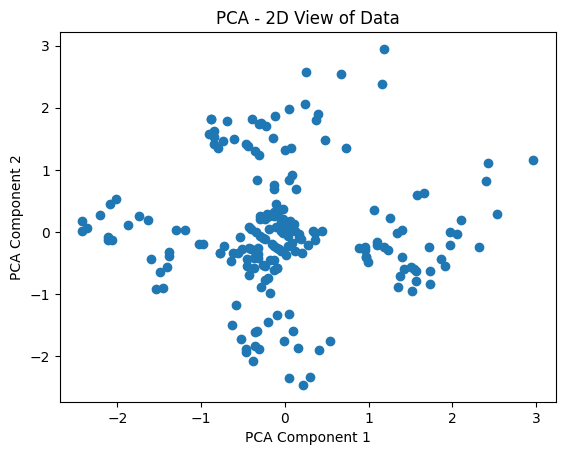

In [6]:
# 1.Load and visualize dataset (optional PCA for 2D view)
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("/content/Mall_Customers.csv")

print(df.head())

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("PCA - 2D View of Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [7]:
# 2.Fit K-Means and assign cluster labels.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)

clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


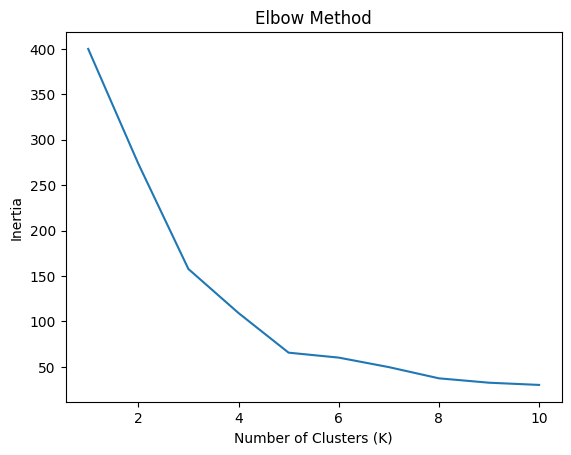

In [3]:
# 3.Use the Elbow Method to find optimal K.
inertia_values = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)


plt.figure()
plt.plot(range(1, 11), inertia_values)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

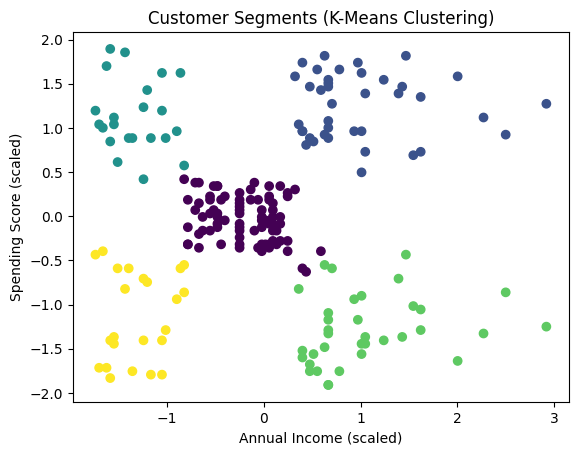

In [4]:
# 4.Visualize clusters with color-coding.

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.figure()
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)
plt.title("Customer Segments (K-Means Clustering)")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()

In [5]:
# 5.Evaluate clustering using Silhouette Score.
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, clusters)

print("Silhouette Score:", score)

Silhouette Score: 0.5546571631111091
